In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import Kitti
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split


import random
%matplotlib inline

In [2]:
seed_number = 4
torch.manual_seed(seed_number)
np.random.seed(seed_number)
random.seed(seed_number)

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

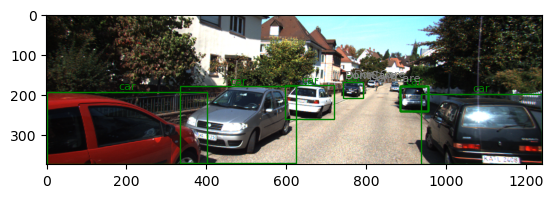

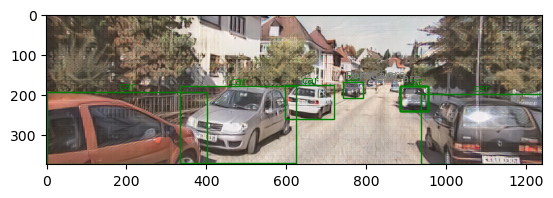

In [4]:

# Download and load the KITTI dataset
kitti_real_dataset = Kitti(root='data/data_real/',  transform=ToTensor(), download = False)
kitti_syn_dataset = Kitti(root='data/data_syn_Carla/',  transform=ToTensor(), download = False)

# Get the k-th image in the list () and its ground truth labels
image_index = 0

# Note that label_real and label_syn are the same
image_real, label_real = kitti_real_dataset[image_index]
image_syn, label_syn  = kitti_syn_dataset[image_index]

# Display the image with the bounding box
fig_real, ax = plt.subplots(1)
ax.imshow(image_real.permute(1, 2, 0))
for box in label_real:
    bbox = box["bbox"]
    x1 = bbox[0]
    y1 = bbox[1]
    x2 = bbox[2]
    y2 = bbox[3]
    #x1, y1, x2, y2 = box

    if box["type"] == "Pedestrian":
        ax.text((x1+x2)/2, y1, 'pedestrian', ha='center', va='bottom', transform=ax.transData, fontsize=8, color='red')
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=1)
    elif box["type"] == "Car":
        ax.text((x1+x2)/2, y1, 'car', ha='center', va='bottom', transform=ax.transData, fontsize=8, color='green')
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='green', linewidth=1)
    elif box["type"] == "Van":
        ax.text((x1+x2)/2, y1, 'van', ha='center', va='bottom', transform=ax.transData, fontsize=8, color='blue')
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='blue', linewidth=1)
    elif box["type"] == "Truck":
        ax.text((x1+x2)/2, y1, 'truck', ha='center', va='bottom', transform=ax.transData, fontsize=8, color='orange')
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='orange', linewidth=1)
    else:
        # For the other classes, we use gray
        ax.text((x1+x2)/2, y1, box["type"], ha='center', va='bottom', transform=ax.transData, fontsize=8, color='gray')
        
    ax.add_patch(rect)
plt.show()

fig_syn, ax = plt.subplots(1)
ax.imshow(image_syn.permute(1, 2, 0))
for box in label_syn:
    bbox = box["bbox"]
    x1 = bbox[0]
    y1 = bbox[1]
    x2 = bbox[2]
    y2 = bbox[3]
    #x1, y1, x2, y2 = box

    if box["type"] == "Pedestrian":
        ax.text((x1+x2)/2, y1, 'pedestrian', ha='center', va='bottom', transform=ax.transData, fontsize=8, color='red')
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=1)
    elif box["type"] == "Car":
        ax.text((x1+x2)/2, y1, 'car', ha='center', va='bottom', transform=ax.transData, fontsize=8, color='green')
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='green', linewidth=1)
    elif box["type"] == "Van":
        ax.text((x1+x2)/2, y1, 'van', ha='center', va='bottom', transform=ax.transData, fontsize=8, color='blue')
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='blue', linewidth=1)
    elif box["type"] == "Truck":
        ax.text((x1+x2)/2, y1, 'truck', ha='center', va='bottom', transform=ax.transData, fontsize=8, color='orange')
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='orange', linewidth=1)
    else:
        # For the other classes, we use gray
        ax.text((x1+x2)/2, y1, box["type"], ha='center', va='bottom', transform=ax.transData, fontsize=8, color='gray')
        
    ax.add_patch(rect)
plt.show()


C:\Users\cheng\anaconda3\envs\ML_experiment\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\cheng\anaconda3\envs\ML_experiment\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


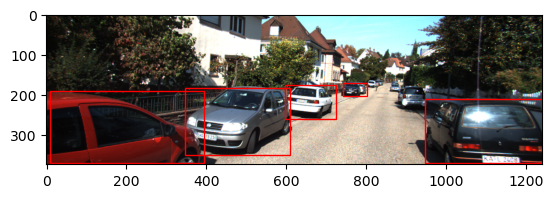

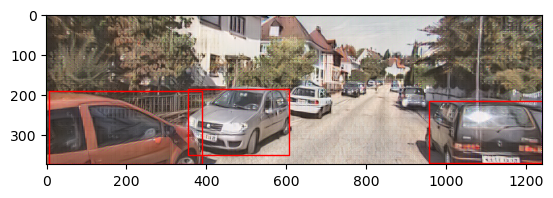

In [5]:
import torch
import torchvision
from torchvision.datasets import Kitti
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained model
#model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.to(device)
model.eval()



# Get an image from the KITTI dataset
image_real, _ = kitti_real_dataset[0]
image_real = image_real.to(device)

# Generate predictions for the image
with torch.no_grad():
    prediction = model([image_real])

# Display the image with the predicted bounding boxes
image_real = image_real.cpu()
prediction = prediction[0]
boxes = prediction['boxes'].cpu().numpy()
scores = prediction['scores'].cpu().numpy()
fig, ax = plt.subplots(1)
ax.imshow(image_real.permute(1, 2, 0))
for box, score in zip(boxes, scores):
    if score > 0.5:
        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)
plt.show()


# Get an image from the KITTI dataset
image_syn, _ = kitti_syn_dataset[0]
image_syn = image_syn.to(device)

# Generate predictions for the image
with torch.no_grad():
    prediction = model([image_syn])

# Display the image with the predicted bounding boxes
image_syn = image_syn.cpu()
prediction = prediction[0]
boxes = prediction['boxes'].cpu().numpy()
scores = prediction['scores'].cpu().numpy()
fig, ax = plt.subplots(1)
ax.imshow(image_syn.permute(1, 2, 0))
for box, score in zip(boxes, scores):
    if score > 0.5:
        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)
plt.show()

In [6]:
model

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=